In [ ]:
from pathlib import Path
import pandas as pd
from IPython.display import display

# Cell 0: load "list01-24_all.csv" into a DataFrame

csv_path = Path("list01-24_all.csv")
if not csv_path.exists():
    raise FileNotFoundError(f"{csv_path} not found in current working directory: {Path.cwd()}")

# Read CSV (adjust encoding/sep/parse_dates as needed)
df = pd.read_csv(csv_path, encoding="utf-8", sep=";", dtype=str)

# Try to convert numeric columns where appropriate
df = df.apply(pd.to_numeric, errors="ignore")

print(f"Loaded {len(df)} rows x {len(df.columns)} columns")
df.head()

C:\Users\Mattis\AppData\Local\Temp\ipykernel_14596\3341752208.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


Loaded 218240 rows x 11 columns


,jahr,geschlecht,altersklasse,disziplin,leistung,wind,name,geburtsjahr,verein,datum,ort
0,2001,W,Frauen,100 m,"11,17","+0,7","Rockmeier, Gabi",73,LG Olympia Dortmund,30.06.,Stuttgart
1,2001,W,Frauen,100 m,"11,23","+1,2","Paschke, Melanie",70,TV Wattenscheid,24.08.,Sondershausen
2,2001,W,Frauen,100 m,"11,24","+0,6","Schielke, Sina",81,LG Olympia Dortmund,16.06.,Mannheim
3,2001,W,Frauen,100 m,"11,33","+0,7","Wagner, Marion",78,USC Mainz,30.06.,Stuttgart
4,2001,W,Frauen,100 m,"11,41","+1,6","Habel, Katchi",82,LG Olympia Dortmund,16.06.,Mannheim


In [148]:
df_100m = df[(df['geschlecht'] == "W") & (df['altersklasse'] == "Frauen") & ((df['disziplin'] == "1500 m") | (df['disziplin'] == "1.500 m")) ].copy()
display(df_100m)

,jahr,geschlecht,altersklasse,disziplin,leistung,wind,name,geburtsjahr,verein,datum,ort,leistung_float
191,2001,W,Frauen,1500 m,"4:04,27",NaN,"Friedrich, Kathleen",77,LAC Erdgas Chemnitz,31.08.,Berlin,244.27
192,2001,W,Frauen,1500 m,"4:06,08",NaN,"Mikitenko, Irina",72,LG Eintracht Frankfurt,09.06.,Dortmund,246.08
193,2001,W,Frauen,1500 m,"4:06,71",NaN,"daFonseca-Wollheim, Kristina",72,LG Eintracht Frankfurt,20.07.,Monte Carlo,246.71
194,2001,W,Frauen,1500 m,"4:11,15",NaN,"Teichmann, Ivonne",77,SC Magdeburg,04.06.,Hengelo,251.15
195,2001,W,Frauen,1500 m,"4:12,42",NaN,"Schulz, Melanie",79,SV Creaton Grossengottern,26.08.,Leverkusen,252.42
...,...,...,...,...,...,...,...,...,...,...,...,...
200098,2023,W,Frauen,1.500 m,"4:24,74",NaN,Amelie Klug,2003,TSV Bayer o4 Leverkusen,02.07.2023,Goettingen,264.74
200099,2023,W,Frauen,1.500 m,"4:24,81",NaN,Tsambika Jaeger,1996,LV Pliezhausen 2012,08.07.2023,Kassel,264.81
200100,2023,W,Frauen,1.500 m,"4:25,11",NaN,Julia Rath,2004,LAC Quelle Fuerth,22.07.2023,Rostock,265.11
200101,2023,W,Frauen,1.500 m,"4:25,73",NaN,Ann-Christin Opitz,1999,SC Melle 03,08.09.2023,Borgholzhausen,265.73


In [149]:
import re

def leistung_to_float(leistung):
    """
    Convert leistung string to float seconds.
    Handles formats:
    - SS,MS (e.g. '49,78')
    - MM:SS,MS (e.g. '3:59,99')
    - MS (e.g. '3322.00')
    """
    if pd.isnull(leistung):
        return None
    leistung = str(leistung).replace(',', '.')
    # MM:SS.MS
    match = re.match(r'(\d+):(\d+\.\d+)', leistung)
    if match:
        minutes = int(match.group(1))
        seconds = float(match.group(2))
        return minutes * 60 + seconds
    # SS.MS or MS
    try:
        return float(leistung)
    except ValueError:
        return None

# Example usage:
df_100m['leistung_float'] = df_100m['leistung'].apply(leistung_to_float)

df_100m['leistung_float']

191       244.27
192       246.08
193       246.71
194       251.15
195       252.42
           ...  
200098    264.74
200099    264.81
200100    265.11
200101    265.73
200102    265.74
Name: leistung_float, Length: 1147, dtype: float64

98        49,78
99        51,13
100       51,25
101       51,41
102       51,55
          ...  
211198    55,23
211199    55,26
211200    55,28
211201    55,39
211202    55,41
Name: leistung_float, Length: 1169, dtype: object

Remaining rows after removing outliers: 1147


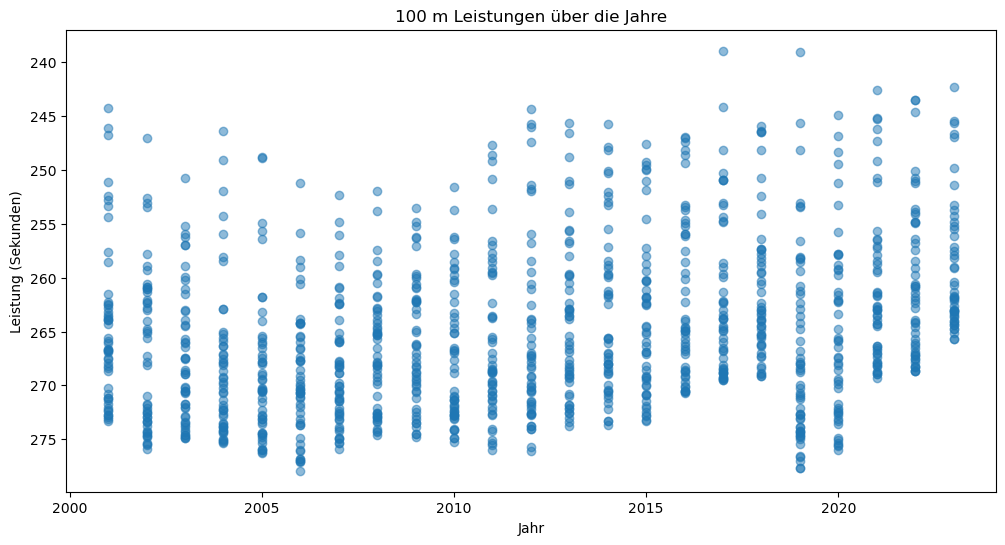

In [150]:
import matplotlib.pyplot as plt

print(f"Remaining rows after removing outliers: {len(df_100m)}")
plt.figure(figsize=(12, 6))
plt.scatter(df_100m['jahr'], df_100m['leistung_float'], alpha=0.5)
plt.xlabel('Jahr')
plt.ylabel('Leistung (Sekunden)')
plt.title('100 m Leistungen über die Jahre')
plt.gca().invert_yaxis()  # Faster times are better
plt.show()

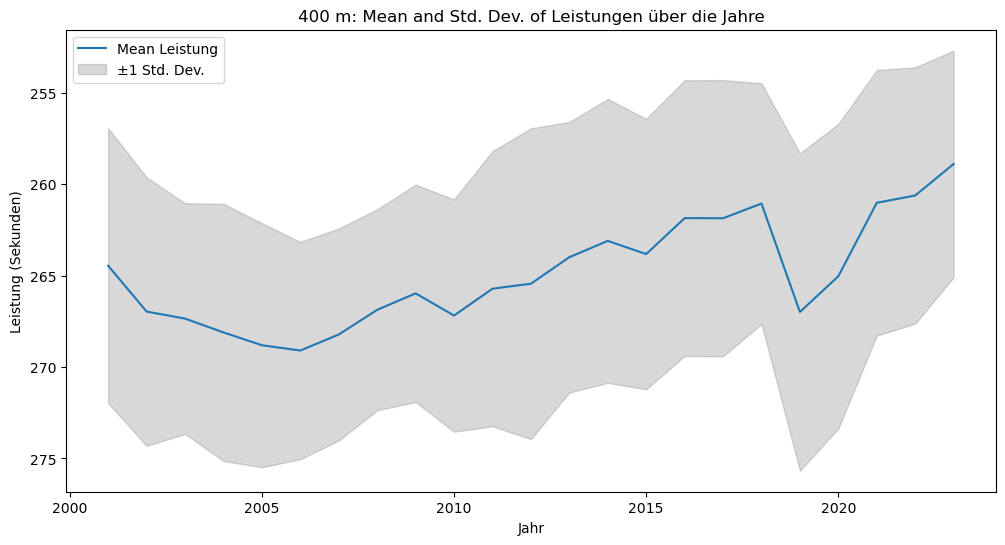

In [151]:
# Group by 'jahr' and calculate mean and std of 'leistung_float'
grouped = df_100m.groupby('jahr')['leistung_float'].agg(['mean', 'std'])

plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['mean'], label='Mean Leistung')
plt.fill_between(grouped.index, grouped['mean'] - grouped['std'], grouped['mean'] + grouped['std'], 
                 color='gray', alpha=0.3, label='±1 Std. Dev.')

plt.xlabel('Jahr')
plt.ylabel('Leistung (Sekunden)')
plt.title('400 m: Mean and Std. Dev. of Leistungen über die Jahre')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

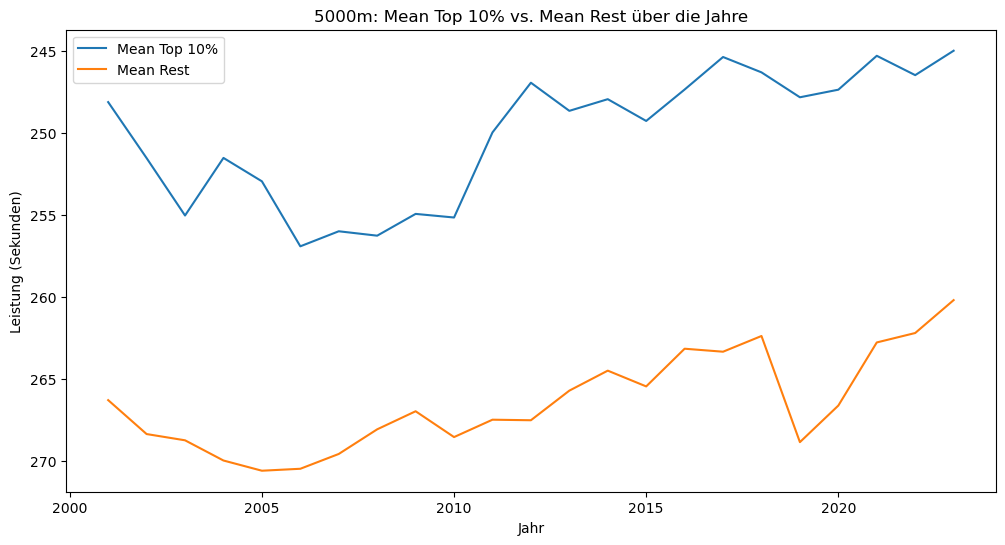

In [152]:
# Calculate mean for top 10% and mean for the rest per year
def top_percent_and_rest_means(df, percent=0.1):
    means_top = []
    means_rest = []
    years = []
    for year, group in df.groupby('jahr'):
        group_sorted = group.sort_values('leistung_float')
        n_top = max(1, int(len(group) * percent))  # At least 1 athlete
        top = group_sorted.head(n_top)
        rest = group_sorted.iloc[n_top:]
        means_top.append(top['leistung_float'].mean())
        means_rest.append(rest['leistung_float'].mean())
        years.append(year)
    return pd.DataFrame({'jahr': years, 'mean_top': means_top, 'mean_rest': means_rest}).set_index('jahr')

means_df = top_percent_and_rest_means(df_100m)

plt.figure(figsize=(12, 6))
plt.plot(means_df.index, means_df['mean_top'], label='Mean Top 10%')
plt.plot(means_df.index, means_df['mean_rest'], label='Mean Rest')
plt.xlabel('Jahr')
plt.ylabel('Leistung (Sekunden)')
plt.title('5000m: Mean Top 10% vs. Mean Rest über die Jahre')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

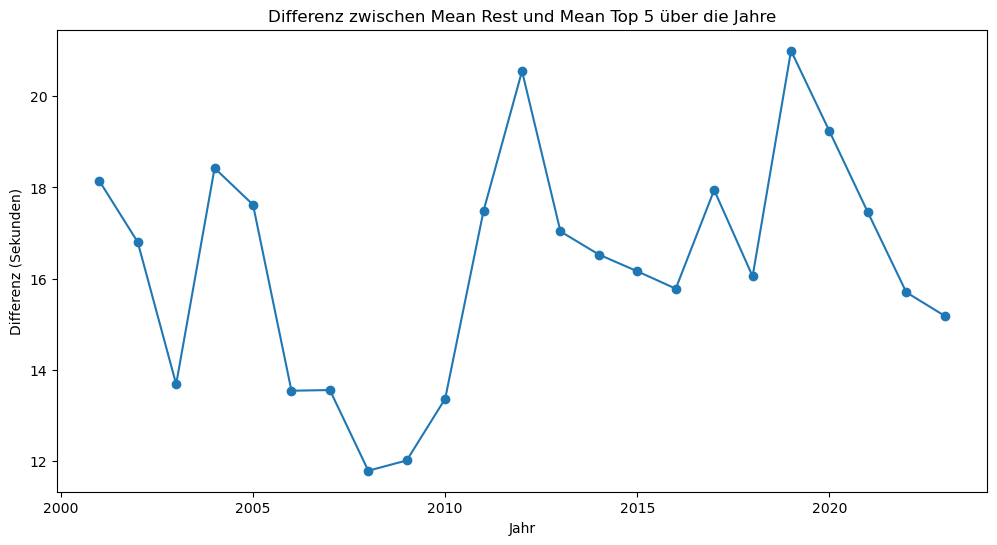

In [153]:
plt.figure(figsize=(12, 6))
diff = means_df['mean_rest'] - means_df['mean_top']
plt.plot(means_df.index, diff, marker='o')
plt.xlabel('Jahr')
plt.ylabel('Differenz (Sekunden)')
plt.title('Differenz zwischen Mean Rest und Mean Top 5 über die Jahre')
plt.show()